In [63]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [64]:
df = pd.read_csv("Data4.csv")

In [65]:
df.columns

Index(['Sl.', 'x1', 'x2', 'x3', 'y'], dtype='object')

In [66]:
df.head()

,Sl.,x1,x2,x3,y
0,1,0.1,0.311089,0.390541,14.705876
1,2,0.2,0.639066,1.389918,26.585100
2,3,0.3,0.840228,1.939903,36.791509
3,4,0.4,1.299710,2.153009,34.090806
4,5,0.5,0.941784,0.945136,31.118089


In [39]:
# df.drop(['x0','y_hat'],axis=1)

,Sl.,x1,x2,x3,y
0,1,0.1,0.311089,0.390541,14.705876
1,2,0.2,0.639066,1.389918,26.585100
2,3,0.3,0.840228,1.939903,36.791509
3,4,0.4,1.299710,2.153009,34.090806
4,5,0.5,0.941784,0.945136,31.118089
...,...,...,...,...,...
95,96,9.6,10.336087,9.979673,183.744594
96,97,9.7,9.928599,10.721891,175.907274
97,98,9.8,10.109046,10.163445,183.992845
98,99,9.9,9.954540,10.562039,173.920425


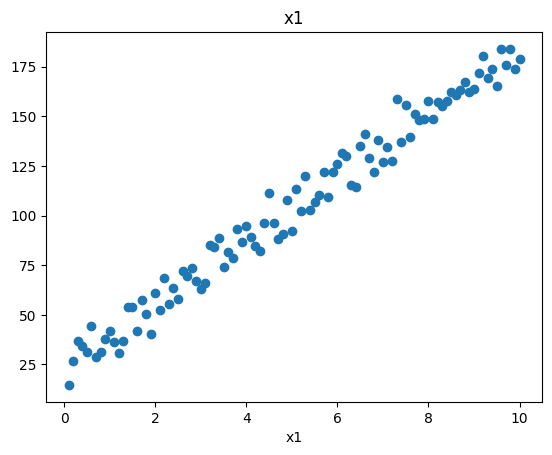

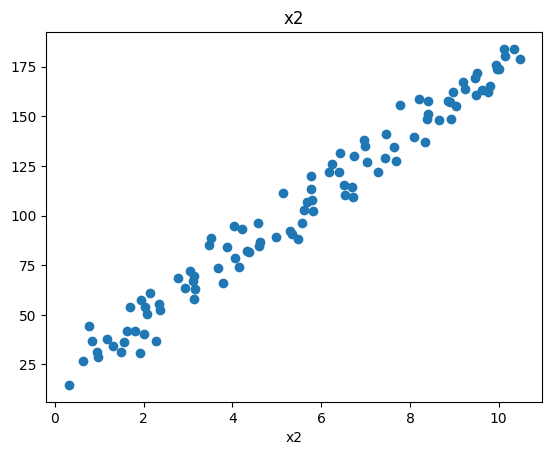

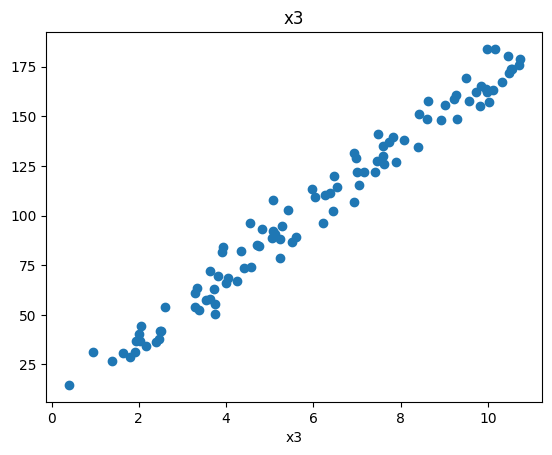

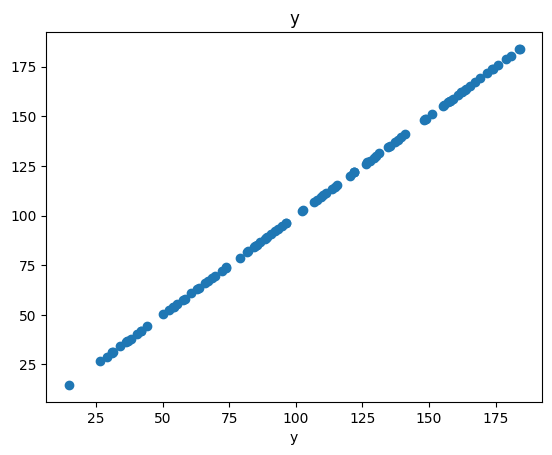

In [67]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['y'])
  plt.title(label)
  plt.xlabel(label)
  plt.show()

In [68]:
df.insert(0, "x0", 1)

In [69]:
y = np.array(df.iloc[:, -1])
X = np.array(df[df.columns[:-1]])

In [70]:
#Initialize the theta
theta = np.ones(len(X[0]))

In [71]:
hypothesis =   X@theta -y #X is matrix of input feature,eta is weight,y is vector of observed output

In [72]:
hypothesis

array([-11.90424582, -21.35611537, -29.71137811, -25.23808636,
       -22.73116951, -33.88773659, -17.49656712, -18.10351803,
       -23.46160679, -25.57151432, -19.15394984, -13.13864752,
       -17.27437795, -33.34835553, -31.37763037, -18.7978148 ,
       -32.53521347, -23.67467029, -14.48344242, -32.37234616,
       -22.5597782 , -36.34418796, -23.01009401, -29.81279772,
       -22.9633397 , -35.92360959, -31.99453526, -33.93959758,
       -26.88038464, -21.98241078, -23.06411043, -40.99651761,
       -39.22945545, -41.85629752, -25.70194072, -32.85746749,
       -27.88425234, -41.38673286, -32.54959316, -40.5969107 ,
       -32.49150855, -28.12564006, -25.01245386, -37.77774922,
       -49.34940871, -32.88482896, -24.92835342, -26.29783758,
       -42.02730741, -25.64384151, -44.64884863, -31.76733298,
       -48.66824065, -31.30787332, -32.76518493, -34.96389957,
       -44.57022333, -31.82909862, -42.68733591, -45.33133608,
       -49.89056582, -46.57013438, -31.75462301, -29.94

In [73]:
m = len(y)

In [74]:
def cost(theta, X=X, y=y, m=m):
    cost = np.transpose(X @ theta - y) @ (X @ theta - y)
    cost = (1 / m) * cost
    return cost

In [78]:
def cost_derivative(j, theta, X=X, y=y, m=m):
    dev = X[:, j] @ (X @ theta - y)
    dev = (1 / m) * dev
    return dev

In [88]:
# Assign a learning rate
a = 0.05
cost_list = []
theta_list = []

# Set a convergence criterion (you may adjust this based on your needs)
convergence_threshold = 1e-4

for i in range(10000):
    for j in range(len(theta)):
        theta[j] -= a * cost_derivative(j, theta)

    # Calculate the cost and append to the cost list
    cost_val = cost(theta)
    cost_list.append(cost_val)

    # Append the current theta to the theta list
    theta_list.append(list(theta))

    # Check for convergence
    if len(cost_list) > 1 and abs(cost_list[-2] - cost_list[-1]) < convergence_threshold:
        print(f"Converged after {i} iterations.")
        break

In [ ]:
w = theta_list[-1]
w

In [87]:
y_pre = np.dot(X, w)
predicted_values = y_pre
actual_values = y

In [82]:
absolute_errors = np.abs(actual_values -predicted_values )
mae = np.mean(absolute_errors)
print("MAE :" , mae)

squared_errors = (actual_values - predicted_values )**2
mse = np.mean(squared_errors)
print("MSE :" ,mse)

rmse = np.sqrt(mse)
print("RMSE :" ,rmse)

mean_actual= np.mean(actual_values)
rss = np.sum((actual_values -predicted_values)**2)
tss = np.sum((actual_values - mean_actual)**2)
r_squared = 1 - (rss / tss)
print("R^2 : ", r_squared)

MAE : nan
MSE : nan
RMSE : nan
R^2 :  nan


In [83]:
df['y_hat'] = predicted_values

In [84]:
pdf = df[:]

In [ ]:
xlist = np.array(pdf['x'])
ylist = np.array(pdf['y_hat'])

data = {'xlist': xlist, 'y_list': ylist}
new_df = pd.DataFrame(data)

sns.pairplot(pdf, x_vars='x' ,y_vars='y', height=4, aspect=1, kind='scatter')
# Line plot
sns.lineplot(x='xlist', y='y_list', data=new_df)
# Show the plot
plt.show()

In [ ]:
#Actual value and the predicted value
reg_model = pd.DataFrame({'Actual value': actual_values, 'Predicted value': predicted_values})
reg_model

In [ ]:
fig = px.scatter(x=reg_model['Predicted value'], y=reg_model['Predicted value']-reg_model['Actual value'], labels={'x': 'Predicted Values', 'y': 'Residuals'}, title='Residual Plot')
fig.show()